In [1]:
# Importing core libraries
import pandas as pd
import seaborn as sns
import numpy as np

from statistics import mode
from sklearn import preprocessing
from datetime import datetime
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Imporing ML models
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


# Data Description.
This dataset is a collection of my personal data for the period from September 1 2022 to November 15 2022. It has 76 days in total.
## Weather attributes
rain:   -  Precipitation Amount (mm)
maxtp:  -  Maximum Air Temperature (C)	  
mintp:  -  Minimum  Air Temperature (C)
gmin:   -  09utc Grass Minimum Temperature (C)
soil:   -  Mean 10cm Soil Temperature (C)
wdsp:   -  Mean Wind Speed (knot)
hm:     -  Highest ten minute mean wind speed (knot)		 
ddhm:   -  Wind Direction at max 10 min. mean (deg)       
hg:     -  Highest Gust (knot)
cbl:    -  Mean CBL Pressure (hpa)
sun:    -  Sunshine duration (hours)
g_rad:  -  Global Radiation (j/cm sq.)
pe:     -  Potential Evapotranspiration (mm)
evap:   -  Evaporation (mm)
smd_wd: -  Soil Moisture Deficits(mm) well drained
smd_md: -  Soil Moisture Deficits(mm) moderately drained
smd_pd: -  Soil Moisture Deficits(mm) poorly drained

In [2]:
# Reading data
data = pd.read_csv('ad_data_merged.csv')
data.head()

,mood,day,period,sex,energy,screen time,sleep (in min),holiday / night out,stress,Cals ( kcal),Fat( g),Sat( g),Carbs( g),Fiber( g),Sugar( g),Prot( g),Weight(kg),Weight(kg).1,BMI,Body Fat(%),Fat-free Body Weight(kg),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(kg),Bone Mass(kg),Protein (%),BMR(kcal),mintp,gmin,rain,cbl,wdsp,hm,ddhm,hg,sun,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd,DistanceWalkingRunning,ActiveEnergyBurned
0,happy,2022-09-01T00:00:00Z,NaN,NaN,NaN,5.3,501,0,0,1670.0,67.8,6.4,145.00,3.5,31.0,76.3,54.75,54.75,20.90,17.5,44.30,16.50,4,56.20,48.10,41.62,2.66,20.00,1330,12.9,5.7,0.0,1012.0,8.7,16,80,23,6.4,1737,18.550,2.6,3.6,64.1,64.1,68.6,0.775960,0
1,happy,2022-09-02T00:00:00Z,NaN,withdrawal,NaN,4.4,445,0,0,1710.0,74.3,8.8,158.87,3.0,39.0,77.9,54.90,54.90,21.00,17.6,44.28,16.60,4,56.10,48.10,41.67,2.67,19.90,1331,11.9,11.0,0.0,1001.8,5.2,9,180,13,1.0,832,18.225,2.0,2.5,65.0,65.0,69.4,1.587660,0
2,sensitive,2022-09-03T00:00:00Z,NaN,withdrawal,NaN,3.7,475,1,0,2200.0,69.6,3.9,235.70,6.8,41.4,58.9,55.00,55.00,20.90,17.5,44.50,16.50,4,56.00,48.30,41.50,2.65,20.00,1329,11.4,11.2,19.5,994.2,6.9,15,140,26,0.2,193,15.600,1.0,1.2,45.9,45.9,50.3,2.588809,0
3,sensitive,2022-09-04T00:00:00Z,NaN,withdrawal,NaN,4.2,482,0,0,1554.0,42.1,7.2,169.00,5.5,36.7,51.8,55.30,55.30,21.98,18.1,45.28,16.42,5,56.48,48.10,42.17,2.73,20.21,1346,10.3,8.4,27.8,994.5,11.4,22,110,35,10.9,1962,16.375,2.3,3.7,19.4,19.4,23.9,5.210396,0
4,pms,2022-09-05T00:00:00Z,NaN,withdrawal,NaN,4.8,325,0,0,1305.0,35.7,2.0,130.80,7.6,29.8,74.4,55.10,55.10,20.61,18.0,44.71,16.19,5,56.18,48.02,41.84,2.69,19.84,1336,11.0,5.1,3.1,998.4,11.2,20,150,31,7.2,1512,16.800,2.1,3.2,18.1,18.1,22.6,1.673860,0


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mood                      76 non-null     object 
 1   day                       76 non-null     object 
 2   period                    18 non-null     object 
 3   sex                       31 non-null     object 
 4   energy                    17 non-null     object 
 5   screen time               50 non-null     float64
 6   sleep (in min)            76 non-null     int64  
 7   holiday / night out       76 non-null     int64  
 8   stress                    76 non-null     int64  
 9   Cals ( kcal)              59 non-null     float64
 10  Fat( g)                   59 non-null     float64
 11  Sat( g)                   59 non-null     float64
 12  Carbs( g)                 59 non-null     float64
 13  Fiber( g)                 58 non-null     float64
 14  Sugar( g)   

In [3]:
# Analysing Target 'mood' column
data['mood'].value_counts()
# Imbalanced dataset

happy        33
sensitive    19
sad          18
pms           6
Name: mood, dtype: int64

## Encoding categorical data

In [4]:
label_encoder = preprocessing.LabelEncoder()

# Encoding Period data
print('Initial period labels: ', data['period'].unique())
# Doing label encoding
data['is period'] = [1 if i is np.NaN else 0 for i in data['period']]
data['period'] = data['period'].astype(str)
data['period']= label_encoder.fit_transform(data['period'])
print('Encoded period labels: ', data['period'].unique())

# Encoding Mood data (target column)
print('Initial mood labels: ', data['mood'].unique())
# Doing label encoding 
data['mood']= label_encoder.fit_transform(data['mood'])
print('Encoded mood labels: ', data['mood'].unique())

# Encoding Sex data
print('Initial sex labels: ', data['sex'].unique())
# Doing label encoding 
data['sex'] = data['sex'].astype(str)
data['sex']= label_encoder.fit_transform(data['sex'])
print('Encoded sex labels: ', data['sex'].unique())

# Encoding Energy data
print('Initial energy labels: ', data['energy'].unique())
# Doing label encoding
data['energy'] = data['energy'].astype(str)
data['energy']= label_encoder.fit_transform(data['energy'])
print('Encoded energy labels: ', data['energy'].unique())

Initial period labels:  [nan 'light' 'heavy' 'medium' 'spotting']
Encoded period labels:  [3 1 0 2 4]
Initial mood labels:  ['happy' 'sensitive' 'pms' 'sad']
Encoded mood labels:  [0 3 1 2]
Initial sex labels:  [nan 'withdrawal']
Encoded sex labels:  [0 1]
Initial energy labels:  [nan 'high_energy' 'energized' 'low_energy' 'exhausted']
Encoded energy labels:  [4 2 0 3 1]


In [5]:
# Since 'ActiveEnergyBurned' was taken from an application that I use only when I go jogging
# It has a lot of different numbers that include the amount of calories that I burned while doing workouts
# I don't have it for every day
# I will be encoding this column into a binary one
data['ActiveEnergyBurned'] = [1 if i > 0 else 0 for i in data['ActiveEnergyBurned']]

In [6]:
data.corr().style.background_gradient(cmap="Blues")

,mood,period,sex,energy,screen time,sleep (in min),holiday / night out,stress,Cals ( kcal),Fat( g),Sat( g),Carbs( g),Fiber( g),Sugar( g),Prot( g),Weight(kg),Weight(kg).1,BMI,Body Fat(%),Fat-free Body Weight(kg),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(kg),Bone Mass(kg),Protein (%),BMR(kcal),mintp,gmin,rain,cbl,wdsp,hm,ddhm,hg,sun,soil,pe,evap,smd_wd,smd_md,smd_pd,DistanceWalkingRunning,ActiveEnergyBurned,is period
mood,1.000000,-0.046931,-0.221167,0.008083,-0.060248,0.020402,-0.066800,0.141404,-0.145589,-0.124564,0.202551,-0.023570,-0.007766,-0.048175,-0.079098,0.072466,0.072466,0.116704,0.102526,0.142656,0.098154,0.056603,0.081516,0.024907,0.175472,0.106633,0.053639,0.130315,-0.095809,-0.040891,0.261510,0.165903,0.010780,0.155044,0.060595,0.122421,-0.061548,-0.003649,-0.103185,-0.089109,-0.010335,-0.032196,0.024627,0.248466,0.260283,0.035643
period,-0.046931,1.000000,0.383166,0.098884,-0.259276,0.147429,-0.060374,-0.047624,-0.165199,-0.162674,-0.141606,-0.186207,0.124492,0.018665,0.087977,-0.444388,-0.444388,-0.373599,-0.484630,-0.405895,-0.357228,-0.313536,-0.312957,0.227825,-0.373780,-0.361173,0.049282,-0.450642,0.138791,0.056718,0.058425,-0.191107,0.132391,0.156703,0.208058,0.103860,-0.139552,-0.048730,-0.022604,-0.028546,0.101474,0.098393,0.094337,-0.021829,-0.009922,0.536434
sex,-0.221167,0.383166,1.000000,0.106902,-0.413362,0.091866,0.126572,-0.070402,0.042154,-0.044246,-0.208004,0.073213,-0.016789,-0.037205,0.000836,-0.236088,-0.236088,-0.256562,-0.211404,-0.271329,-0.279311,-0.098058,-0.157500,-0.166143,-0.269620,-0.292901,-0.126653,-0.314408,0.061192,0.078436,0.004538,-0.312578,0.160307,0.146688,0.242795,0.065549,0.086859,-0.014363,0.152857,0.143670,0.143159,0.151704,0.127458,-0.451451,-0.313610,0.210473
energy,0.008083,0.098884,0.106902,1.000000,-0.147148,0.153405,0.085324,-0.072507,0.027347,0.045818,-0.170451,0.137157,-0.037468,0.039753,-0.055120,-0.048320,-0.048320,-0.111564,-0.085531,-0.097393,-0.094102,0.089585,-0.232002,-0.062194,-0.064938,-0.144184,0.061475,-0.146070,0.208492,0.150113,-0.006288,-0.128721,-0.041895,-0.063421,-0.100765,-0.026681,-0.027751,0.337473,0.280095,0.261319,0.130439,0.131253,0.138235,0.057291,0.052732,0.028674
screen time,-0.060248,-0.259276,-0.413362,-0.147148,1.000000,0.271295,0.016101,-0.255934,-0.037574,0.157090,0.118266,0.067374,0.012500,0.198410,0.047632,-0.038338,-0.038338,-0.103634,0.092508,-0.104542,-0.176186,-0.109699,0.087094,0.110343,-0.148718,-0.012009,-0.259160,-0.015708,-0.132387,-0.189532,-0.325015,0.377212,-0.312777,-0.189440,0.232354,-0.287185,-0.162314,-0.059091,-0.137893,-0.101486,-0.006343,0.048657,0.011064,0.087038,0.027037,-0.193108
sleep (in min),0.020402,0.147429,0.091866,0.153405,0.271295,1.000000,-0.248429,-0.190846,-0.287183,-0.220264,0.230437,-0.282607,0.070014,0.159506,-0.118954,-0.343688,-0.343688,-0.176352,-0.274300,-0.251928,-0.218243,-0.247843,-0.051326,0.222351,-0.264735,-0.229241,0.054233,-0.278819,0.142534,0.046014,-0.034938,-0.134738,-0.207058,-0.086418,-0.067529,-0.124655,-0.038189,0.203118,0.073454,0.089843,0.274096,0.279634,0.298666,-0.089623,0.157823,0.268869
holiday / night out,-0.066800,-0.060374,0.126572,0.085324,0.016101,-0.248429,1.000000,-0.221273,0.682909,0.606088,-0.135468,0.580085,0.112811,0.237093,0.214835,0.097742,0.097742,-0.025733,0.046194,-0.025384,-0.036534,0.040359,-0.091468,-0.240235,-0.068066,-0.081426,-0.288407,-0.028608,-0.018936,0.035747,-0.020218,0.034725,0.058184,-0.055592,0.203857,-0.069822,0.077746,-0.038355,0.099058,0.069869,-0.014702,-0.017971,-0.036786,0.050496,-0.221273,-0.112546
stress,0.141404,-0.047624,-0.070402,-0.072507,-0.255934,-0.190846,-0.221273,1.000000,-0.114359,-0.111114,-0.001489,-0.042298,-0.233484,-0.086771,-0.227742,0.110544,0.110544,0.207313,0.168681,0.197837,0.240526,0.029779,0.190196,0.085041,0.208065,0.138522,0.053026,0.150916,-0.214201,-0.131679,0.068810,-0.011863,0.130022,0.149121,-0.004604,0.232566,-0.013177,-0.243719,-0.198794,-0.214074,-0.163243,-0.166398,-

In [ ]:
corr = data.corrwith(data["mood"])
corr.sort_values()

Cals ( kcal)               -0.144741
Fat( g)                    -0.124564
pe                         -0.103185
mintp                      -0.095809
evap                       -0.089109
Prot( g)                   -0.079098
holiday / night out        -0.066800
sun                        -0.061548
screen time                -0.060248
Sugar( g)                  -0.048175
gmin                       -0.040891
smd_md                     -0.032196
Carbs( g)                  -0.023570
smd_wd                     -0.010335
Fiber( g)                  -0.007766
soil                       -0.003649
energy                      0.008083
wdsp                        0.010780
period                      0.013630
sleep (in min)              0.020402
smd_pd                      0.024627
Skeletal Muscle(%)          0.024907
Protein (%)                 0.053639
Visceral Fat                0.056603
ddhm                        0.060595
 Weight(kg)                 0.072466
 Weight(kg).1               0.072466
B

# Filling in missing days

In [6]:
# Screen time
rng = np.random.default_rng(0)
mu = data['screen time'].mean()
sd = data['screen time'].std()
filler = pd.Series(rng.normal(loc=mu, scale=sd, size=len(data)))
data['screen time'] = data['screen time'].fillna(filler)

In [7]:
# Food consumption data 
for i in data.columns[9:16]:
  rng = np.random.default_rng(0)
  mu = data[i].mean()
  sd = data[i].std()
  filler = pd.Series(rng.normal(loc=mu, scale=sd, size=len(data)))
  data[i] = data[i].fillna(filler)
data[data.columns[10:16]].round(2)

,Fat( g),Sat( g),Carbs( g),Fiber( g),Sugar( g),Prot( g)
0,67.80,6.40,145.00,3.50,31.00,76.30
1,74.30,8.80,158.87,3.00,39.00,77.90
2,69.60,3.90,235.70,6.80,41.40,58.90
3,42.10,7.20,169.00,5.50,36.70,51.80
4,35.70,2.00,130.80,7.60,29.80,74.40
...,...,...,...,...,...,...
71,48.80,15.40,69.20,1.00,18.70,54.40
72,69.40,1.00,84.93,4.88,13.00,48.48
73,35.28,13.89,121.06,5.30,43.75,66.29
74,43.23,11.96,72.51,0.10,38.40,52.84


# Date Processing

In [8]:
data['day'] = pd.to_datetime(data['day'])
data['weekday'] = data['day'].dt.dayofweek
# {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

In [9]:
#from google.colab import files
#data.to_csv('output.csv', encoding = 'utf-8-sig') 
#files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Checking of there are any missing values
data.isnull().any()

mood                        False
day                         False
period                      False
sex                         False
energy                      False
screen time                 False
sleep (in min)              False
holiday / night out         False
stress                      False
Cals ( kcal)                False
Fat( g)                     False
Sat( g)                     False
Carbs( g)                   False
Fiber( g)                   False
Sugar( g)                   False
Prot( g)                    False
 Weight(kg)                 False
 Weight(kg).1               False
BMI                         False
Body Fat(%)                 False
Fat-free Body Weight(kg)    False
Subcutaneous Fat(%)         False
Visceral Fat                False
Body Water(%)               False
Skeletal Muscle(%)          False
Muscle Mass(kg)             False
Bone Mass(kg)               False
Protein (%)                 False
BMR(kcal)                   False
mintp         

# Synthesising additional data

In [10]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
df_to_extend = data.drop('day', axis=1)
model.fit(df_to_extend)
sample = model.sample(200)
sample.head()

/usr/local/lib/python3.7/dist-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/usr/local/lib/python3.7/dist-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale


,mood,period,sex,energy,screen time,sleep (in min),holiday / night out,stress,Cals ( kcal),Fat( g),...,soil,pe,evap,smd_wd,smd_md,smd_pd,DistanceWalkingRunning,ActiveEnergyBurned,is period,weekday
0,2,3,0,3,7.0,344,0,0,1333.0,40.0,...,10.334,0.3,0.4,0.9,-9.3,-9.0,3.814660,0,0,2
1,2,4,1,3,6.0,453,0,1,1142.0,60.0,...,12.895,0.5,0.7,8.2,2.5,5.8,6.242670,1,1,4
2,0,4,0,4,4.0,377,0,1,885.0,38.0,...,12.294,0.9,1.1,2.0,-5.9,-3.1,12.864145,1,0,0
3,2,1,0,4,1.0,381,0,0,1841.0,103.0,...,12.533,1.2,1.3,26.3,27.3,11.0,5.339006,0,0,4
4,2,2,0,3,5.0,481,0,0,1549.0,41.0,...,16.539,1.4,1.9,9.9,8.5,4.7,7.663272,1,1,0


In [11]:
synthesised_df = pd.DataFrame(sample)
data_big = df_to_extend.append(synthesised_df)

# Visualizating original data

In [12]:
# Since I have 75 instances visual graph representation might be overloaded
# I decided to compress it from daily to weekly data 
# I will be taking weekly average for each of the attributes
new_df = data[['mood', 'day', 'rain', 'sex', 'period', 'stress', 'holiday / night out']]
new_df = new_df.set_index("day")
new_df.index = new_df.index - pd.tseries.frequencies.to_offset("6D")

In [13]:
df = new_df.resample("W").agg({"rain": "mean", 'sex':'sum', 'period':'count', 'stress':'sum', 'holiday / night out' : 'sum' }).reset_index()

In [14]:
# I will be using mode to find leading mood and period for each week
# mood attribute
i = 2
d = data['mood'][2:]
all_l = []
while i < len(d):
  l = []
  j = 0
  while j < 7:
    l.append(d[i])
    j += 1
  all_l.append((mode(l)))
  i += 7
all_l.insert(0, 0)
df['mood'] = all_l
i = 2
# period attribute
d = data['period'][2:]
all_p = []
while i < len(d):
  l = []
  j = 0
  while j < 7:
    l.append(d[i])
    j += 1
  all_p.append((mode(l)))
  i += 7
all_p.insert(3, 0)
df['period'] = all_p
week = [str(i)[0:-15] for i in df['day']]
df['day'] = week

In [15]:
df

,day,rain,sex,period,stress,holiday / night out,mood
0,2022-08-28,6.500000,2,3,0,1,0
1,2022-09-04,9.185714,2,0,0,1,3
2,2022-09-11,1.657143,3,3,1,2,2
3,2022-09-18,2.985714,2,0,3,2,0
4,2022-09-25,1.685714,5,3,1,2,2
5,2022-10-02,2.200000,1,3,3,1,0
6,2022-10-09,1.114286,4,1,1,0,0
7,2022-10-16,6.271429,2,3,4,1,2
8,2022-10-23,4.257143,3,3,2,1,0
9,2022-10-30,1.557143,4,3,3,4,0


<AxesSubplot:xlabel='day'>

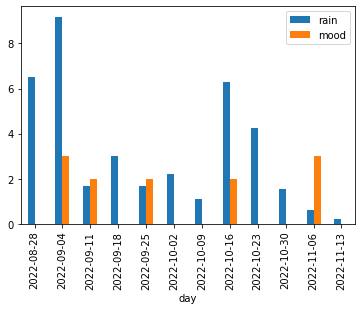

In [16]:
df.plot.bar(x='day', y=['rain', 'mood'])

<AxesSubplot:xlabel='day'>

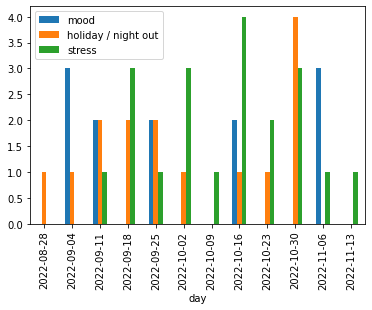

In [17]:
df.plot.bar(x='day', y=['mood', 'holiday / night out', 'stress'])

<AxesSubplot:xlabel='day'>

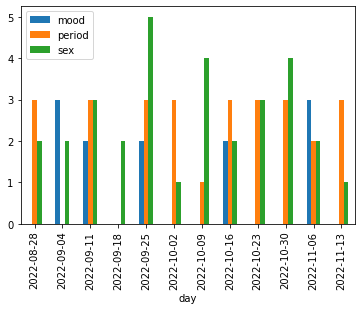

In [19]:
df.plot.bar(x='day', y=['mood', 'period', 'sex'])

In [ ]:
# Will be plotting mode mood against all these columns weekly
# need to check period and sex

In [131]:
# I also would like to visualise how my weight and my nutrition depend on my period
new_df = data[['day', 'is period', ' Weight(kg)', 'Cals ( kcal)','Sugar( g)', 'mood', 'sleep (in min)']]
new_df = new_df.set_index("day")
new_df.index = new_df.index - pd.tseries.frequencies.to_offset("6D")
df_2 = new_df.resample("W").agg({"is period": "sum", ' Weight(kg)':'mean', 
                               'Cals ( kcal)':'mean', 'Sugar( g)' : 'mean', 'sleep (in min)':'mean' }).reset_index()
# I will be using mode to find leading mood and period for each week
# mood attribute
i = 2
d = data['mood'][2:]
all_l = []
while i < len(d):
  l = []
  j = 0
  while j < 7:
    l.append(d[i])
    j += 1
  all_l.append((mode(l)))
  i += 7
all_l.insert(0, 0)
df_2['mood'] = all_l
i = 2
# period attribute
d = data['is period'][2:]
all_p = []
while i < len(d):
  l = []
  j = 0
  while j < 7:
    l.append(d[i])
    j += 1
  all_p.append((mode(l)))
  i += 7
all_p.insert(1, 0)
df_2['is period'] = all_p
week = [str(i)[0:-15] for i in df['day']]
df_2['day'] = week

In [132]:
df_2

,day,is period,Weight(kg),Cals ( kcal),Sugar( g),sleep (in min),mood
0,,1,54.883333,1860.000000,37.133333,473.666667,0
1,,0,55.864286,1772.428571,25.600000,418.857143,3
2,,0,55.214286,1618.055385,28.905903,395.000000,2
3,,1,54.171429,1416.187764,28.518973,386.285714,0
4,,1,54.100000,1855.366366,35.496000,425.142857,2
5,,1,56.028571,1900.477491,34.020696,336.857143,0
6,,0,55.092857,1340.767144,20.576711,371.285714,0
7,,1,55.064286,1940.865315,49.665819,367.000000,2
8,,1,54.792857,1401.857143,20.947143,415.285714,0
9,,1,55.600000,1951.511955,25.358937,336.571429,0


In [118]:
data.columns

Index(['mood', 'period', 'sex', 'energy', 'screen time', 'sleep (in min)',
       'holiday / night out', 'stress', 'Cals ( kcal)', 'Fat( g)', 'Sat( g)',
       'Carbs( g)', 'Fiber( g)', 'Sugar( g)', 'Prot( g)', ' Weight(kg)',
       ' Weight(kg).1', 'BMI', 'Body Fat(%)', 'Fat-free Body Weight(kg)',
       'Subcutaneous Fat(%)', 'Visceral Fat', 'Body Water(%)',
       'Skeletal Muscle(%)', 'Muscle Mass(kg)', 'Bone Mass(kg)', 'Protein (%)',
       'BMR(kcal)', 'mintp', 'gmin', 'rain', 'cbl', 'wdsp', 'hm', 'ddhm', 'hg',
       'sun', 'g_rad', 'soil', 'pe', 'evap', 'smd_wd', 'smd_md', 'smd_pd',
       'DistanceWalkingRunning', 'ActiveEnergyBurned', 'is period', 'weekday'],
      dtype='object')

# Using PyCaret finding the best ML models for my data 

In [67]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from pycaret.classification import * 

In [28]:
data = data.drop(['day'], axis=1)

In [26]:
# Trying on extended data
clf = setup(data=data_big, target='mood',
normalize=True,
transformation=True,
ignore_low_variance=True,
remove_multicollinearity=True,
preprocess=True,
pca=True,
feature_selection=True,
train_size = 0.8, log_experiment=True, experiment_name='personal_data')

,Description,Value
0,session_id,6115
1,Target,mood
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(276, 48)"
5,Missing Values,False
6,Numeric Features,37
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='mood',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                                                    top_features_to_pick=0.19999999999999996)),
             

In [27]:
best = compare_models(sort='F1') # extended data

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.4000,0.6317,0.3969,0.4313,0.3956,0.1853,0.1914,0.021
svm,SVM - Linear Kernel,0.3955,0.0000,0.3982,0.4148,0.3882,0.1829,0.1877,0.061
ridge,Ridge Classifier,0.3727,0.0000,0.3670,0.4054,0.3626,0.1464,0.1528,0.016
lr,Logistic Regression,0.3682,0.6262,0.3598,0.4092,0.3598,0.1399,0.1449,0.493
nb,Naive Bayes,0.3636,0.5960,0.3520,0.3662,0.3502,0.1275,0.1309,0.017
rf,Random Forest Classifier,0.3409,0.5619,0.2975,0.3169,0.3033,0.0694,0.0711,0.514
ada,Ada Boost Classifier,0.3227,0.5017,0.2873,0.3277,0.2985,0.0590,0.0654,0.142
knn,K Neighbors Classifier,0.3091,0.5538,0.2958,0.3165,0.2899,0.0555,0.0606,0.119
lightgbm,Light Gradient Boosting Machine,0.3000,0.5164,0.2739,0.2845,0.2751,0.0321,0.0342,0.455
et,Extra Trees Classifier,0.3182,0.5425,0.2775,0.2712,0.2745,0.0391,0.0381,0.483


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [35]:
# pycaret on original data
clf = setup(data=data, target='mood',
normalize=True,
transformation=True,
ignore_low_variance=True,
remove_multicollinearity=True,
preprocess=True,
pca=True,
feature_selection=True,
train_size = 0.75, log_experiment=True, experiment_name='personal_data')

,Description,Value
0,session_id,8327
1,Target,mood
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(76, 48)"
5,Missing Values,False
6,Numeric Features,36
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='mood',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                                                    top_features_to_pick=0.19999999999999996)),
             

In [ ]:
best = compare_models(sort='F1') # oriinal data
# Do not touch

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5467,0.2281,0.4944,0.5039,0.5021,0.2862,0.2997,0.364
lr,Logistic Regression,0.5600,0.2703,0.5500,0.4781,0.4882,0.3622,0.4111,0.026
ridge,Ridge Classifier,0.4400,0.0000,0.4292,0.4103,0.3935,0.2036,0.2271,0.014
svm,SVM - Linear Kernel,0.4233,0.0000,0.4236,0.3856,0.3720,0.1918,0.2110,0.066
knn,K Neighbors Classifier,0.4533,0.2435,0.3292,0.3385,0.3685,0.1018,0.1368,0.115
ada,Ada Boost Classifier,0.4200,0.2092,0.3708,0.3536,0.3636,0.1394,0.1604,0.098
et,Extra Trees Classifier,0.4767,0.2312,0.3500,0.3178,0.3583,0.0829,0.1124,0.450
lda,Linear Discriminant Analysis,0.3700,0.1994,0.2917,0.3606,0.3494,0.1379,0.1572,0.017
rf,Random Forest Classifier,0.4767,0.2267,0.3250,0.3021,0.3456,0.0676,0.0917,0.462
nb,Naive Bayes,0.4600,0.1706,0.3833,0.3185,0.3454,0.1044,0.1157,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7111, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [47]:
# GBC with pycaret
gbc = create_model('gbc')
predict_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.3556,0.0000,0.0000,0.0000,-0.2857,-0.3482
1,0.6667,0.8667,0.6667,0.6667,0.6222,0.5385,0.5833
2,0.5000,0.5667,0.4167,0.4167,0.4444,0.2500,0.2611
3,0.5000,0.7000,0.4167,0.4167,0.4524,0.1818,0.1925
4,0.3333,0.0000,0.2778,0.5000,0.3889,-0.0435,-0.0455
5,0.3333,0.0000,0.2222,0.2500,0.2857,-0.0909,-0.1066
6,0.5000,0.0000,0.3889,0.4167,0.4524,0.1000,0.1066
7,0.6000,0.0000,0.5000,0.4667,0.5200,0.3333,0.3608
8,0.6000,0.0000,0.6667,0.6000,0.6000,0.3750,0.3750


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 14
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8327, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(cc

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.3158,0.5945,0.25,0.2538,0.2811,0.0389,0.0407


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_35,Component_36,Component_37,Component_38,Component_39,Component_40,Component_41,mood,Label,Score
0,-0.148029,-2.502120,-2.821155,1.860868,0.780541,1.009862,-1.538046,-0.792112,0.915972,0.907268,...,-0.292954,-0.126749,-0.579912,0.040245,-0.521417,-0.320192,-0.344038,0,3,0.9231
1,0.149403,-2.407245,-4.313408,-0.672136,-0.612998,0.446313,-0.095841,1.173475,1.612977,-0.940718,...,0.024027,-0.951225,-0.632644,0.125280,0.540154,0.298075,0.001214,2,0,0.7371
2,-3.039627,1.569631,1.264671,-0.091873,-1.779974,-1.785665,-1.497200,1.231727,-0.690008,0.898955,...,-0.012909,0.161829,0.189072,0.002707,0.409767,-0.359352,-0.020424,1,2,0.7064
3,-3.968268,1.614194,0.597401,1.533299,3.853963,-0.765034,0.480241,2.561297,0.166113,1.497081,...,-0.291189,-0.590510,-0.626601,0.166178,0.583750,0.495161,-0.309478,0,0,0.8242
4,-2.683793,1.513003,-1.562871,1.320221,0.182897,-2.427308,-0.934206,2.562998,-0.492916,0.814528,...,0.593023,1.007142,0.966637,-0.712933,-0.284675,0.483966,-0.853091,3,3,0.9160
5,-0.205378,-0.681918,-3.514336,3.583861,-1.598885,-1.236080,-0.418917,1.511924,1.315245,-0.229154,...,0.657173,0.854620,0.581481,0.235582,0.219054,0.149105,-0.991708,3,3,0.4210
6,4.553652,-0.249336,0.711559,-1.730330,1.551264,-2.050650,-1.743355,-0.513961,-0.542186,-0.617288,...,0.331805,0.351794,0.366412,-0.446505,0.008847,0.030777,0.146214,2,1,0.8502
7,-1.799352,1.743023,0.760258,-1.382928,5.209503,-1.507888,0.888350,0.849749,-0.497573,1.012606,...,-0.618398,0.018831,-0.755518,0.104340,0.136395,0.130372,0.295303,3,0,0.9761
8,-0.251853,-2.215923,-2.942400,-0.737757,-0.167453,0.189135,0.205981,2.108946,1.386753,1.407393,...,-0.502720,-0.436902,-0.360656,-0.123054,0.426562,-0.158282,-0.232869,3,0,0.9805
9,0.858912,-0.708059,-1.790766,-2.367395,-0.090290,-0.434652,-0.077360,-0.307075,0.771679,-0.941562,...,0.416910,-0.041421,0.605744,-0.236174,0.052515,-0.149466,-0.155526,0,0,0.9464


In [48]:
evaluate_model(gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8327, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Creating GBC manually

In [55]:
# Splitting our data into test and train
X = data.drop(['mood', 'g_rad'] ,axis=1)
y = data['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
# Data Normalization
# Using Min/Max Scaler
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)
# Applying PCA 
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [57]:
# Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0, max_depth=3, random_state=0).fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

0.21052631578947367
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.17      0.50      0.25         2
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         2

    accuracy                           0.21        19
   macro avg       0.21      0.25      0.18        19
weighted avg       0.36      0.21      0.22        19



# Extreme Gradient Boosting

0.3157894736842105


Text(0.5, 0, 'Xgboost Feature Importance')

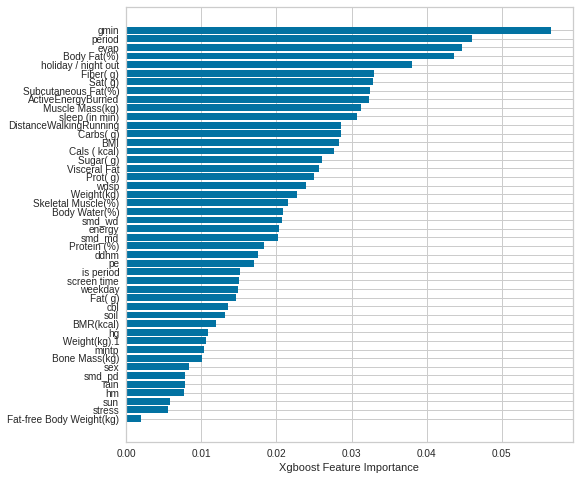

In [58]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)
sorted_idx = xgb_clf.feature_importances_.argsort()
plt.figure(figsize=(8, 8))
# Getting Feature importance
plt.barh(X.columns[sorted_idx], xgb_clf.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [59]:
thresholds = sort(xgb_clf.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_clf, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.002, n=46, Accuracy: 31.58%
Thresh=0.006, n=45, Accuracy: 31.58%
Thresh=0.006, n=44, Accuracy: 26.32%
Thresh=0.008, n=43, Accuracy: 31.58%
Thresh=0.008, n=42, Accuracy: 31.58%
Thresh=0.008, n=41, Accuracy: 31.58%
Thresh=0.008, n=40, Accuracy: 31.58%
Thresh=0.010, n=39, Accuracy: 31.58%
Thresh=0.010, n=38, Accuracy: 31.58%
Thresh=0.011, n=37, Accuracy: 31.58%
Thresh=0.011, n=36, Accuracy: 15.79%
Thresh=0.012, n=35, Accuracy: 15.79%
Thresh=0.013, n=34, Accuracy: 21.05%
Thresh=0.014, n=33, Accuracy: 21.05%
Thresh=0.015, n=32, Accuracy: 21.05%
Thresh=0.015, n=31, Accuracy: 26.32%
Thresh=0.015, n=30, Accuracy: 26.32%
Thresh=0.015, n=29, Accuracy: 21.05%
Thresh=0.017, n=28, Accuracy: 26.32%
Thresh=0.018, n=27, Accuracy: 26.32%
Thresh=0.018, n=26, Accuracy: 26.32%
Thresh=0.020, n=25, Accuracy: 26.32%
Thresh=0.020, n=24, Accuracy: 31.58%
Thresh=0.021, n=23, Accuracy: 31.58%
Thresh=0.021, n=22, Accuracy: 36.84%
Thresh=0.022, n=21, Accuracy: 31.58%
Thresh=0.023, n=20, Accuracy: 26.32%
T

# Sorting Imbalanace in our target

In [63]:
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
# Fixing imbalance in the target column
print('Initial target data spread: ', Counter(y))
undersample = CondensedNearestNeighbour(n_neighbors=1)
X_n, Y_n = undersample.fit_resample(X,y)
print(Counter(Y_n))

Initial target data spread:  Counter({0: 33, 3: 19, 2: 18, 1: 6})
Counter({0: 9, 2: 9, 3: 7, 1: 6})


0.375


Text(0.5, 0, 'Xgboost Feature Importance')

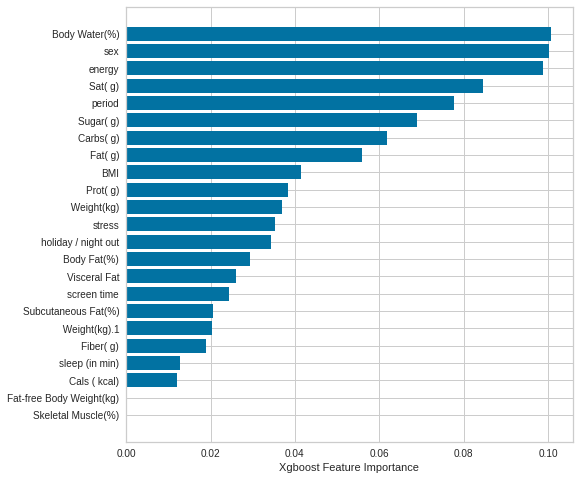

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_n, Y_n,test_size=0.25)
# Scaling our data 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)
# Applying PCA 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# XGB Classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)
sorted_idx = xgb_clf.feature_importances_.argsort()
plt.figure(figsize=(8, 8))
plt.barh(X.columns[sorted_idx], xgb_clf.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [66]:
y_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.00      0.00      0.00         2
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         1

    accuracy                           0.38         8
   macro avg       0.21      0.29      0.24         8
weighted avg       0.27      0.38      0.31         8



# Checking Feature Importance with VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_var = data.drop([ 'mood', 'g_rad'] ,axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_var.columns
vif_data["VIF"] = [variance_inflation_factor(X_var.values, i) for i in range(len(X_var.columns))]

In [69]:
vif_data.sort_values('VIF')

,feature,VIF
6,stress,4.058737e+00
5,holiday / night out,4.376324e+00
29,rain,4.933573e+00
1,sex,5.320345e+00
43,ActiveEnergyBurned,5.862453e+00
45,weekday,8.209789e+00
42,DistanceWalkingRunning,1.095708e+01
9,Sat( g),1.236550e+01
12,Sugar( g),1.278829e+01
35,sun,1.366391e+01


# Creating new model for data with removed irrelevant features

0.5454545454545454


Text(0.5, 0, 'Xgboost Feature Importance')

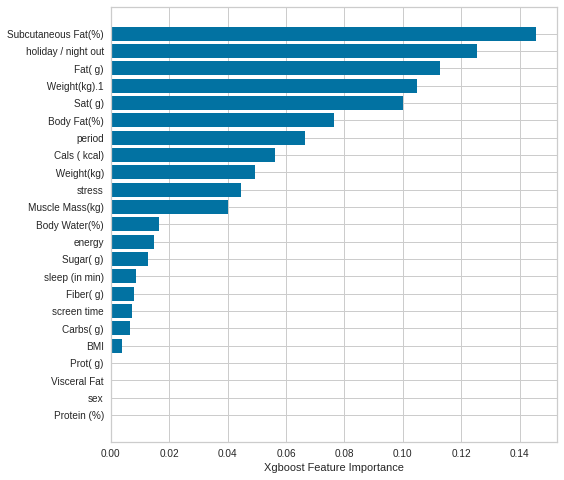

In [73]:
# Removing features that have low importance
X_rem = data.drop([ 'mood', 'g_rad', 'Skeletal Muscle(%)', 'Fat-free Body Weight(kg)', 'pe', 'ddhm', 'gmin', 
                   'Bone Mass(kg)', 'smd_wd', 'smd_md', 'smd_pd'] ,axis=1)
y_rem = data['mood']
undersample = CondensedNearestNeighbour(n_neighbors=1)
X_1, Y_1 = undersample.fit_resample(X_rem,y_rem)
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1,test_size=0.3)
# Scaling our data 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)
# Applying PCA 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# XGB Classifier 
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)
sorted_idx = xgb_clf.feature_importances_.argsort()
plt.figure(figsize=(8, 8))
plt.barh(X_rem.columns[sorted_idx], xgb_clf.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [74]:
y_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.33      1.00      0.50         1
           2       0.33      0.50      0.40         2
           3       1.00      0.50      0.67         2

    accuracy                           0.55        11
   macro avg       0.60      0.62      0.54        11
weighted avg       0.68      0.55      0.57        11



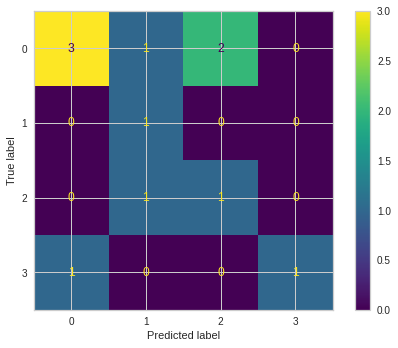

In [78]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3])
cm_display.plot()
plt.show()

In [75]:
print(Counter(y_test))

Counter({0: 6, 3: 2, 2: 2, 1: 1})


In [115]:
# Tuning hyper-parameters for XGB
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [50,100,500,1000],
                  'max_depth'    : [4,6,8,3,5]
                 }
XGB = XGBClassifier()
grid_XGB = GridSearchCV(estimator=XGB, param_grid = parameters, cv = 2, n_jobs=-1)
grid_XGB.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

 The best score across ALL searched params:
 0.5606060606060606

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [116]:
XGB_tuned = XGBClassifier(n_estimators=100, subsample = 0.9, learning_rate = 0.01, max_depth=4)
XGB_tuned.fit(X_train, y_train)
y_pred_tuned = XGB_tuned.predict(X_test)
score = xgb_clf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred_tuned))
# Tunning did make any improvement

0.5454545454545454
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.33      1.00      0.50         1
           2       0.33      0.50      0.40         2
           3       1.00      0.50      0.67         2

    accuracy                           0.55        11
   macro avg       0.60      0.62      0.54        11
weighted avg       0.68      0.55      0.57        11

